In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = 'image', img = None, size =10 ):
    w, h = image.shape[1], image.shape[0]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [4]:
import requests

url = "https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg"
response = requests.get(url)

with open("scan.jpeg", "wb") as file:
    file.write(response.content)
print("Arquivo baixado com sucesso!")


Arquivo baixado com sucesso!


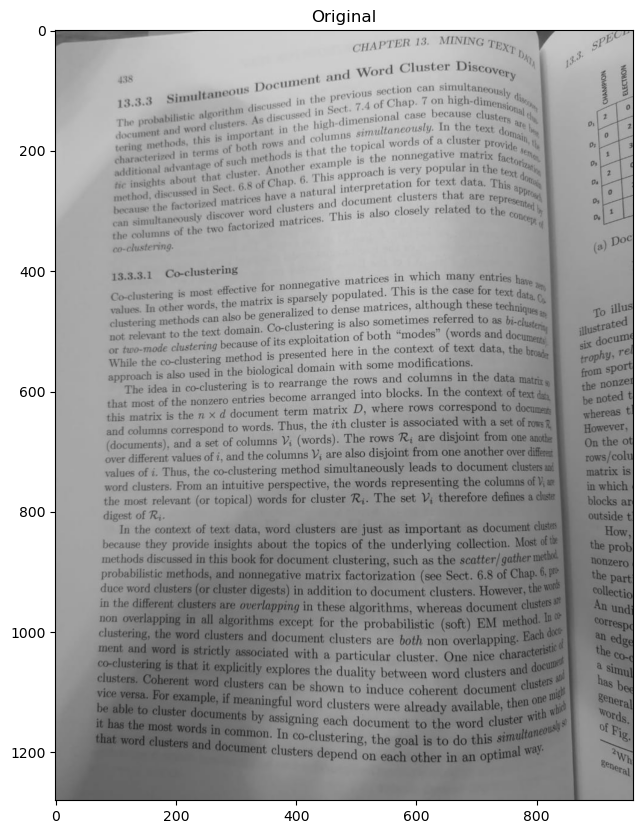

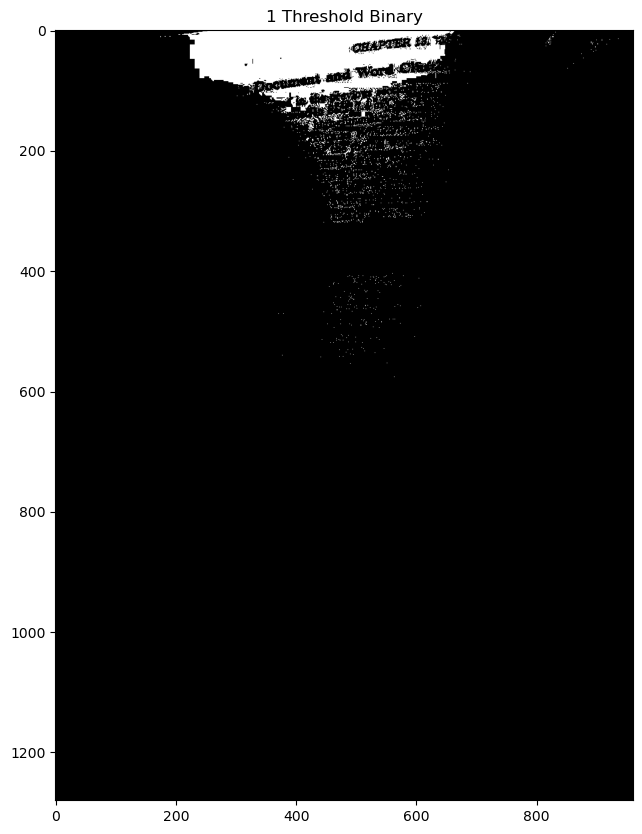

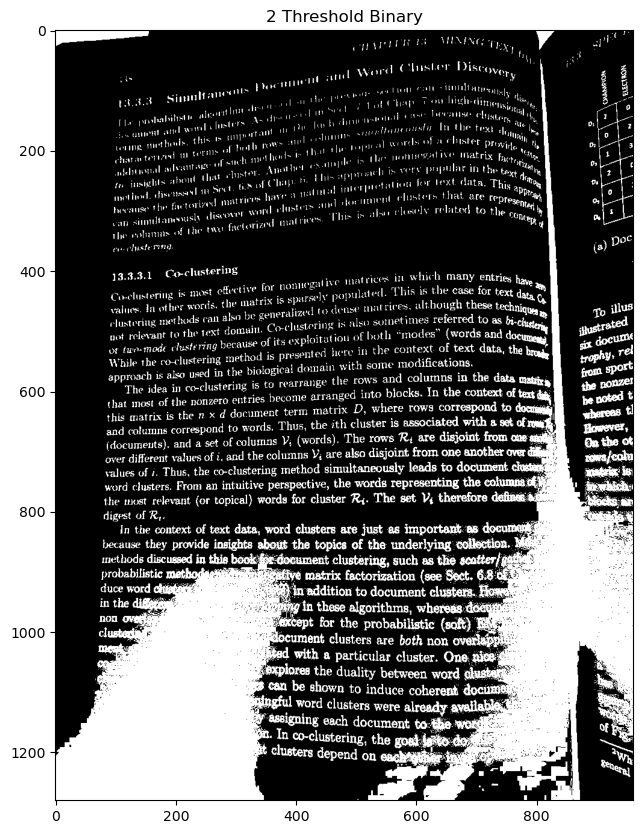

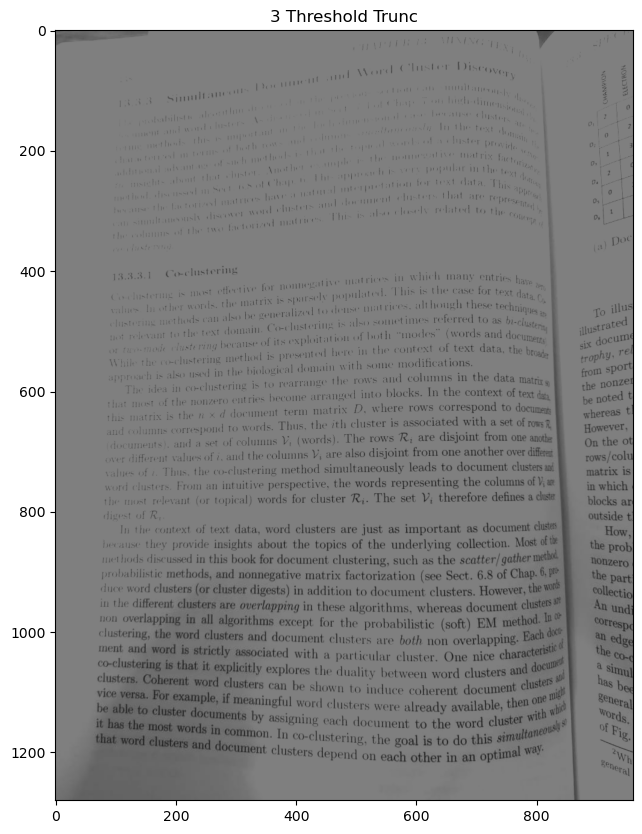

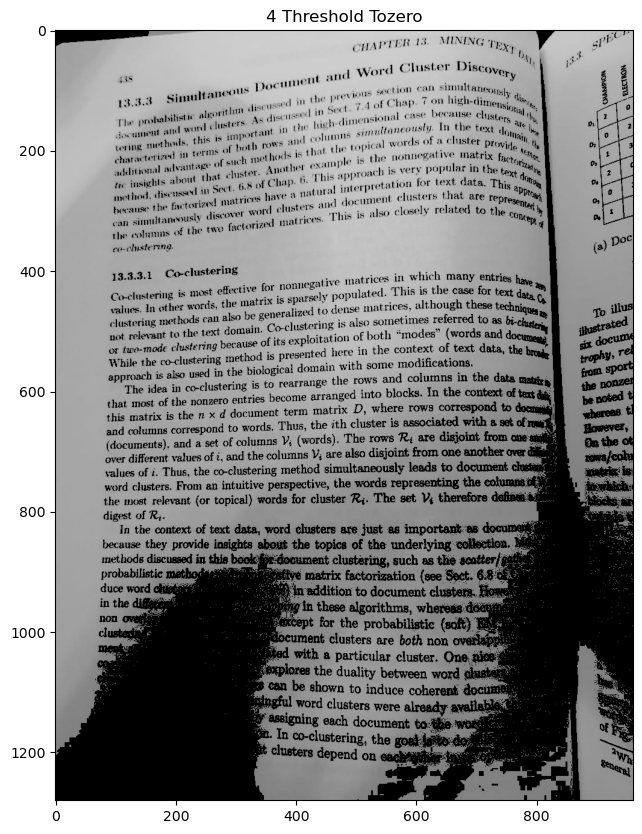

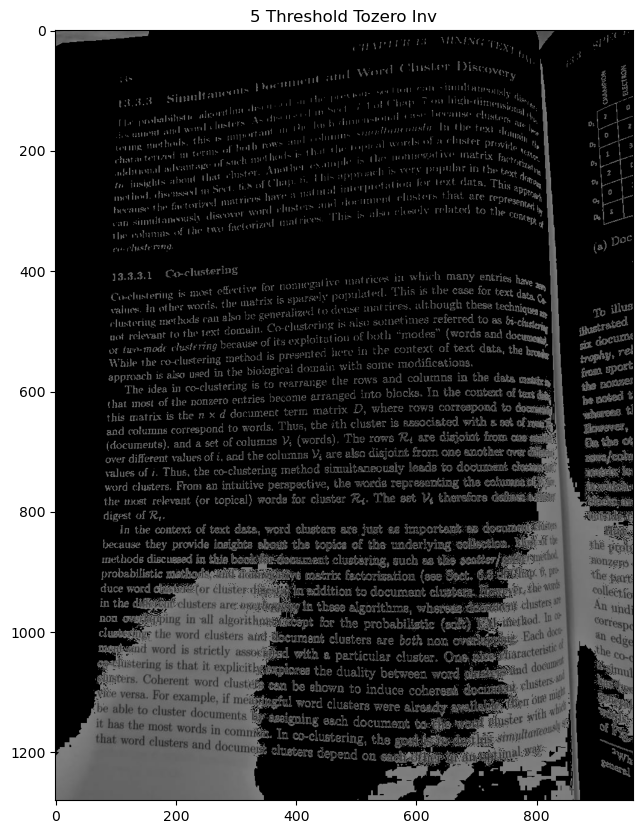

In [5]:
image = cv2.imread(r"C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\ComputerVision\Visao_Computacional\OpenCv\ImageOperation\extracted_images\images\scan.jpeg", 0)
imshow('Original', image)

#Values bellow 127 goes to 0 (black, everything above goes to 255(white))
ret, thresh1 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary', thresh1)

ret, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary', thresh2)

ret, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('3 Threshold Trunc', thresh3)

ret, thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 Threshold Tozero', thresh4)

ret, thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 Threshold Tozero Inv', thresh5)



## Adaptive Thresholding

1. **ADAPTIVE_THRESH_MEAN_C**
2. **THRESH_OTSU**

#### cv2.adaptiveThreshold Parameters

**Sintaxe:**
```python
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst


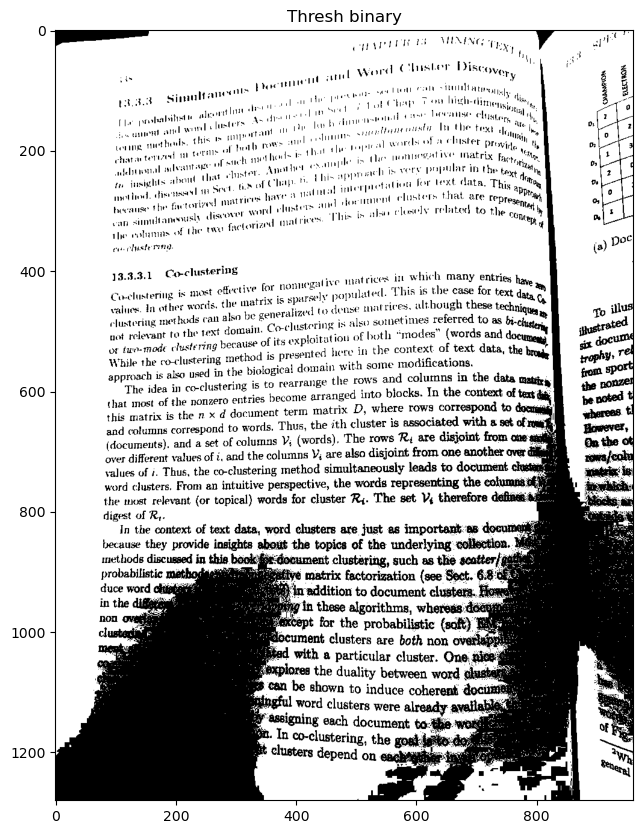

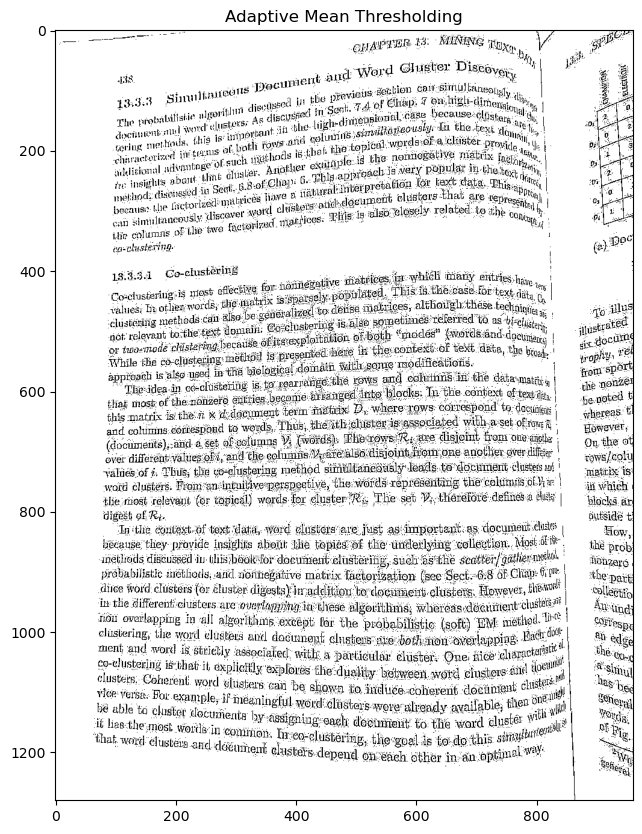

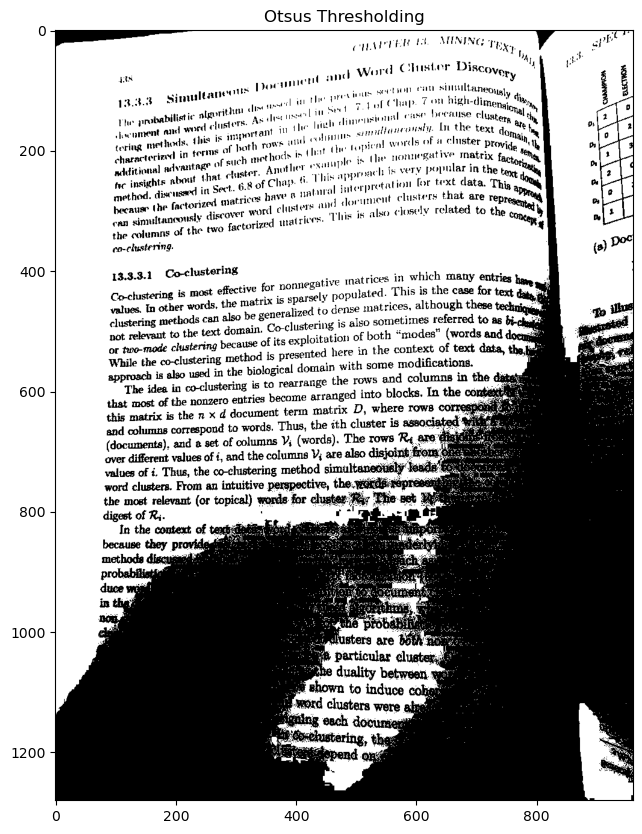

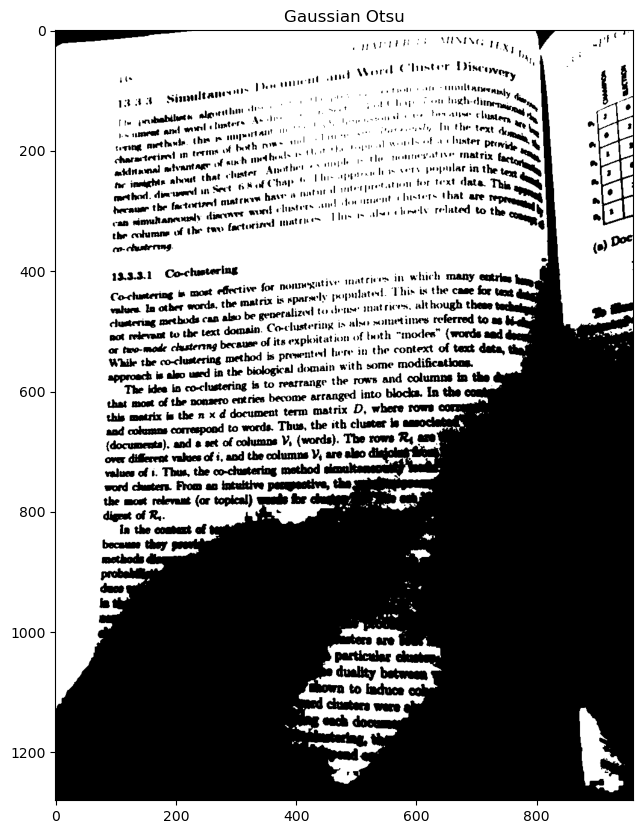

In [6]:
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Thresh binary', thresh1)

#it's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3,3), 0)

#Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
imshow('Adaptive Mean Thresholding', thresh)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Otsus Thresholding', th2)

#Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Gaussian Otsu', th3)

In [7]:
!pip install skimage


  Using cached skimage-0.0.tar.gz (757 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
from skimage.filters import threshold_local

image = cv2.imread(r'C:\Users\vish8\OneDrive\Desktop\Cursos\ComputerVision\OpenCv\ImageOperation\extracted_images\images\scan.jpeg', 0)

# We get the value component from the HSV color space
# then we apply adaptive thresholding to
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method='gaussian')

# Apply the threshold operation
thresh = (V > T).astype('uint8') * 255
imshow('threshold local', thresh)


error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x9faa3a91::Set<3,-1,-1>,struct cv::impl::A0x9faa3a91::Set<0,5,-1>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
